# Train and validation accuracies and losses - Line plots

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Reading in result files
with open('data/data_Myanmar_from_scratch.out') as f:
    M_orig = f.readlines()
with open('data/data_Nepal_transferred.out') as f:
    N_trans = f.readlines()
with open('data/data_Nepal_finetuned.out') as f:
    N_fine = f.readlines()
with open('data/data_Nepal_from_scratch.out') as f:
    N_orig = f.readlines()

In [3]:
# Functions for obtaining the train, validation and test losses and accuracies

def get_train_val_loss(file):
    train_loss = []
    val_loss = []
    for line in file:
        if line.startswith('train Loss:'):
            train_loss.append(float(line[12:18]))
        elif line.startswith('val Loss:'):
            val_loss.append(float(line[10:16]))
    return train_loss, val_loss

def get_train_val_acc(file):
    train_acc = []
    val_acc = []
    for line in file:
        if line.startswith('train Loss:'):
            train_acc.append(float(line[24:30]))
        elif line.startswith('val Loss:'):
            val_acc.append(float(line[22:28]))
    return train_acc, val_acc

def get_test_loss_acc(file):
    test_loss = 0
    test_acc = 0
    for line in file:
        if line.startswith('TEST Loss:'):
            test_loss = float(line[12:18])
            test_acc = float(line[24:30])
    return test_loss, test_acc

In [4]:
# Train, validation and test losses and accuracies for Myanmar original
train_loss_M_orig, val_loss_M_orig = get_train_val_loss(M_orig)
train_acc_M_orig, val_acc_M_orig = get_train_val_acc(M_orig)
test_loss_M_orig, test_acc_M_orig = get_test_loss_acc(M_orig)

# Test losses and accuracies for Nepal transferred
test_loss_N_trans, test_acc_N_trans = get_test_loss_acc(N_trans)

# Train, validation and test losses and accuracies for Nepal finetuned
train_loss_N_fine, val_loss_N_fine = get_train_val_loss(N_fine)
train_acc_N_fine, val_acc_N_fine = get_train_val_acc(N_fine)
test_loss_N_fine, test_acc_N_fine = get_test_loss_acc(N_fine)

# Train, validation and test losses and accuracies for Nepal original
train_loss_N_orig, val_loss_N_orig = get_train_val_loss(N_orig)
train_acc_N_orig, val_acc_N_orig = get_train_val_acc(N_orig)
test_loss_N_orig, test_acc_N_orig = get_test_loss_acc(N_orig)

# Epochs
epoch = np.arange(10)

In [5]:
import matplotlib.pylab as pylab
params = {'legend.fontsize': 12,
          'axes.labelsize': 14,
          'axes.titlesize': 14,
          'xtick.labelsize':12,
          'ytick.labelsize': 12}
pylab.rcParams.update(params)

def plot_accuracy(ax, data, label, color, is_train):
    if is_train:
        label1 = 'Train '
    else:
        label1 = 'Val '
    ax.plot(epoch, data, label = label1 + label, color = color) 
    ax.scatter(epoch, data, color = color)
    ax.set_title('Accuracy')
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Accuracy')

def plot_loss(ax, data, label, color, is_train):
    if is_train:
        label1 = 'Train '
    else:
        label1 = 'Val '
    ax.plot(epoch, data, label = label1 + label, color = color) 
    ax.scatter(epoch, data, color = color)
    ax.set_title('Loss')
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Loss')

In [6]:
label_l1 = 'Myanmar'
label_l2 = 'Nepal'
label_l3 = 'Nepal finetuned'

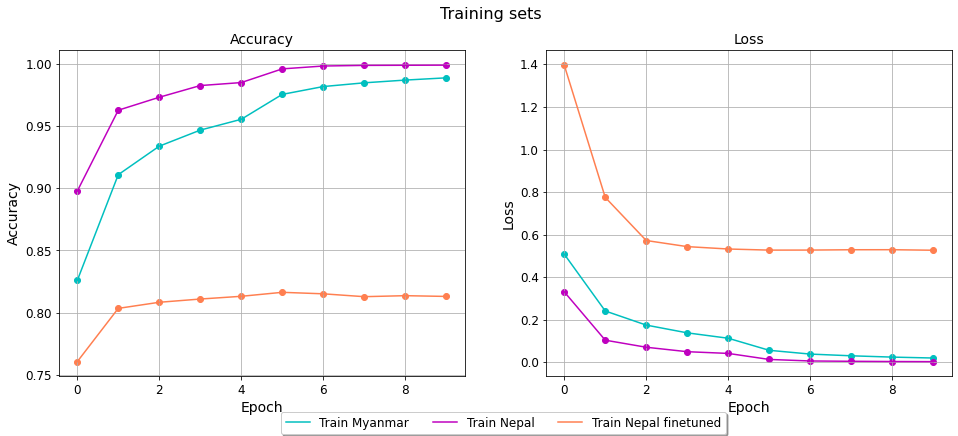

In [7]:
fig, (ax_acc, ax_loss) = plt.subplots(1, 2, figsize = (16,6))
plt.suptitle('Training sets', fontsize=16)

plot_accuracy(ax_acc, train_acc_M_orig, label_l1, 'c', True)
plot_accuracy(ax_acc, train_acc_N_orig, label_l2, 'm', True)
plot_accuracy(ax_acc, train_acc_N_fine, label_l3, 'coral', True)
ax_acc.grid()

plot_loss(ax_loss, train_loss_M_orig, label_l1, 'c', True)
plot_loss(ax_loss, train_loss_N_orig, label_l2, 'm', True)
plot_loss(ax_loss, train_loss_N_fine, label_l3, 'coral', True)
ax_loss.grid()

handles, labels = ax_loss.get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.437, -0.01), fancybox=True, shadow=True, ncol=3)#, fontsize=12)

plt.savefig('training_acc_loss_plot.png')
plt.show()

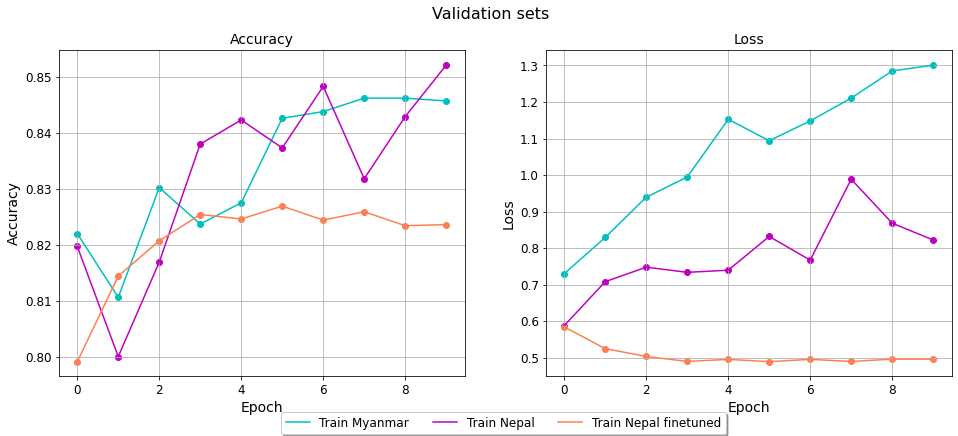

In [8]:
fig, (ax_acc, ax_loss) = plt.subplots(1, 2, figsize = (16,6))
plt.suptitle('Validation sets', fontsize=16)

plot_accuracy(ax_acc, val_acc_M_orig, label_l1, 'c', True)
plot_accuracy(ax_acc, val_acc_N_orig, label_l2, 'm', True)
plot_accuracy(ax_acc, val_acc_N_fine, label_l3, 'coral', True)
ax_acc.grid()

plot_loss(ax_loss, val_loss_M_orig, label_l1, 'c', True)
plot_loss(ax_loss, val_loss_N_orig, label_l2, 'm', True)
plot_loss(ax_loss, val_loss_N_fine, label_l3, 'coral', True)
ax_loss.grid()

handles, labels = ax_loss.get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.437, -0.01), fancybox=True, shadow=True, ncol=3)#, fontsize=12)

plt.savefig('validation_acc_loss_plot.png')
plt.show()